# intro to regression task using neural network
in regression task output shape will be 1
and input shape will be number of feature
if you have features and labels as numpy array, turn this into tensors using tf.constant()

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

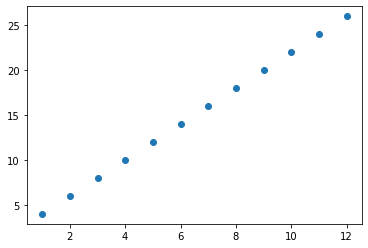

In [28]:
# our data with one feature and one label( input shape=1, hidden shape=1)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y=np.array([4,6,8,10,12,14,16,18,20,22,24,26])
plt.scatter(X,y)

In [29]:
# need to convert numpy array to tensorflow tensors
X=tf.cast(tf.constant(X), tf.float32)
y=tf.constant(tf.cast(y, tf.float32))
X.dtype,y.dtype

(tf.float32, tf.float32)

## steps im modeling in tensorflow
1.  **Creating a model** -define input, output and hidden layer of model.
2.  **Compiling model** -define loss function(that tells our model how wrong it is),  and the optimiser(tells our model how to improve the pattern its learning) and evaluation metrics(interprete model performance).
3.   **Fitting a model** -let model find pattern between features(covariates) and labels.



In [30]:
# set random seed for reproducability
tf.random.set_seed(42)
# create model using sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
# you got 5 opportunity to go through all X and y value and try find patterns
#  can alson use "sgd". in place of tf.keras.optimizers.SGD(). if they have shortcot name like mae/SGD you can replace with string version of that.

Epoch 1/100
1/1 [==============================] - 0s 364ms/step - loss: 9.9055 - mae: 9.9055
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4730 - mae: 9.4730
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0405 - mae: 9.0405
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6080 - mae: 8.6080
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1755 - mae: 8.1755
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7430 - mae: 7.7430
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3105 - mae: 7.3105
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8780 - mae: 6.8780
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.4455 - mae: 6.4455
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.0130 - mae: 6.0130
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

In [31]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(12, 1), dtype=float32, numpy=
array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.]], dtype=float32)>

In [32]:
y_pred=model.predict([[20]])

1/1 [==============================] - 0s 100ms/step


In [33]:
y_pred

array([[43.893505]], dtype=float32)

## Improve the model
we can improve the model by altering steps we took to create our model.
* create model--add more layers, increase hidden units(nurons) in each hidden layer, change activation function of each layer.
* compile a model--change optimization function/change learning rate of optimization function.
* fitting model--fit with more epochs or more data





In [34]:
# lets tweak hyperparameter
# create model
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# model compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss=tf.keras.losses.mae,
              metrics=["mae"])
# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
# here adding adam with learning rate 0.00001 didnt improve

Epoch 1/100
1/1 [==============================] - 1s 613ms/step - loss: 13.5824 - mae: 13.5824
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 13.5823 - mae: 13.5823
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 13.5823 - mae: 13.5823
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 13.5823 - mae: 13.5823
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5823 - mae: 13.5823
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 13.5823 - mae: 13.5823
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 13.5823 - mae: 13.5823
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5823 - mae: 13.5823
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5823 - mae: 13.5823
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5823 - mae: 13.5823
Epoch 11/100
1/1 [==============================

In [35]:
# lets create model by adding 100 units layer
tf.random.set_seed(42)
# create model using sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(lr=0.1),
              metrics=["mae"])
# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
# it improved

Epoch 1/100
1/1 [==============================] - 0s 445ms/step - loss: 15.6919 - mae: 15.6919
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 15.0137 - mae: 15.0137
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3734 - mae: 14.3734
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7527 - mae: 13.7527
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1257 - mae: 13.1257
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4723 - mae: 12.4723
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7888 - mae: 11.7888
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0689 - mae: 11.0689
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3196 - mae: 10.3196
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5124 - mae: 9.5124
Epoch 11/100
1/1 [==============================] 

In [36]:
# lets make prediction
model.predict([[20]])
# maybe overfitting, the metrics from training data is not real performance metrics but the metrics from unseen data.

1/1 [==============================] - 0s 73ms/step


array([[41.786926]], dtype=float32)

# Evaluating model
when evaluating model, visualize, visualize, visualize
data/model itself/training of model/predictions of model

In [37]:
# lets make bigger data
X=tf.range(-100,100,2)
y=2*X**3-2

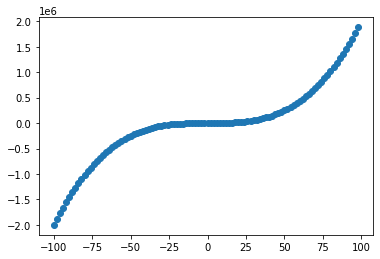

In [38]:
plt.scatter(X,y)

In [39]:
# the 3 set...
from sklearn.model_selection import train_test_split

### what we are going for here three data sets train, validation and test?
=>generalization(ablity for machine learning model to perform well on data it hasnt seen before)


In [40]:
# lets split to train and test
len(X)

100

In [41]:
# 80 percent of 100 samples is 80 so, 80 train set ramaining test set

In [42]:
X_train=X[:80]
y_train=y[:80]
X_test=X[80:]
y_test=y[80:]

In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

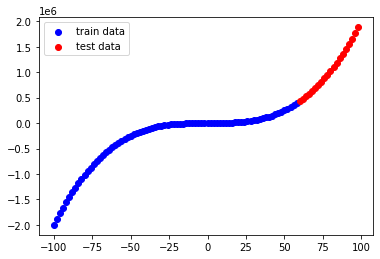

In [44]:
# lets visualize our data of different set
plt.scatter(X_train, y_train, c="b", label="train data")
plt.scatter(X_test, y_test, c="r", label="test data")
plt.legend();

In [45]:
# lets built model
# create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# model compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# fit model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [46]:
# before fitting model, lets visualize it
model.summary()

ValueError: ignored

In [47]:
# model.build(input_shape=(1))

In [48]:
input_shape=tf.expand_dims(X, axis=-1)[0].shape
input_shape
# shape of one(here zeroth index is choosen as eg but can be any as they have same shape) element in X (features) is input shape.

TensorShape([1])

In [103]:
# or
# specify input shape in first layer for automatic build to run summary without fitting model
# lets create model which builds automatically by defining input shape as argument in first layer
# usually neural network can determine the input shape, however sometime you need to manually define it depending on what problem you working on...
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="first_sequential_model")
model.compile(
    loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

Here
1> dense means fully connected layer
2> total params= total number of parameters model oing to learn. patterns that model going to learn
3> trainable parameter=patterns/ parameters models can update as it trains
4> when we import model which has already learned pattern , we freeze those learnt patterns at that time we have bunch of non trainable params. we just have few trainable params at that time.
5> non trainable params arnt updated during training ==transfer learning
actual params in dense layer are weight matricx and bias vector

sequential_16, dense_18 (Dense)   in summery means how many time you instanciate that in entire colab till now. it increases each time you rerun or reinstantiate them.


In [104]:
# lets fit
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [105]:
model.summary()

Model: "first_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


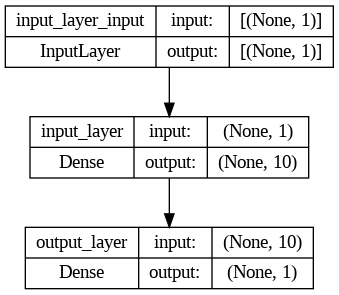

In [106]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# visualizing our model predictions
plot ground truth(y_test) vs model prediction(y_pred)

In [127]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [128]:
y_pred

array([[514595.38],
       [531919.7 ],
       [549244.06],
       [566568.44],
       [583892.75],
       [601217.1 ],
       [618541.44],
       [635865.9 ],
       [653190.2 ],
       [670514.56],
       [687838.94],
       [705163.2 ],
       [722487.6 ],
       [739812.  ],
       [757136.3 ],
       [774460.56],
       [791784.94],
       [809109.4 ],
       [826433.7 ],
       [843758.06]], dtype=float32)

In [129]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 431998,  476654,  524286,  574990,  628862,  685998,  746494,
        810446,  877950,  949102, 1023998, 1102734, 1185406, 1272110,
       1362942, 1457998, 1557374, 1661166, 1769470, 1882382], dtype=int32)>

In [130]:
def plot_pred(train_data=X_train, 
              test_data=X_test,
              train_labels=y_train, 
              test_labels=y_test,
              test_pred=y_pred):
  """
  plot training and test data for compairing ground truth and prediction
  """
  plt.scatter(train_data, train_labels, c="r", label="training data")
  plt.scatter(test_data, test_labels, c="b", label="testing_data")
  plt.scatter(test_data, test_pred, c="g", label="predictions" )
  plt.legend()


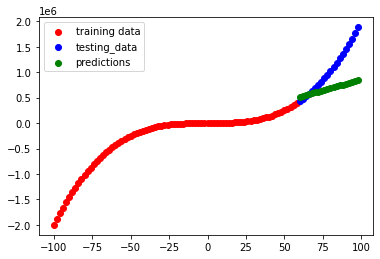

In [131]:
plot_pred()

# Evaluating our models predictions with regression evaluation metrics

In [132]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 41ms/step - loss: 386223.4062 - mae: 386223.4062


[386223.40625, 386223.40625]

In [133]:
# MAE
tf.keras.losses.MeanAbsoluteError()(y_test, y_pred)


<tf.Tensor: shape=(), dtype=float32, numpy=454622.66>

In [134]:
tf.keras.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([546576.5 , 533480.4 , 521353.34, 509226.3 , 497989.56, 487594.9 ,
       477200.3 , 467506.1 , 458843.9 , 450181.75, 441703.6 , 434773.9 ,
       427844.16, 420914.4 , 415048.9 , 409851.66, 404654.3 , 399456.97,
       395858.44, 392393.6 ], dtype=float32)>

In [138]:
# both should be in tensors and both should have same shape

In [144]:
tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=386223.4>

In [145]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 431998,  476654,  524286,  574990,  628862,  685998,  746494,
        810446,  877950,  949102, 1023998, 1102734, 1185406, 1272110,
       1362942, 1457998, 1557374, 1661166, 1769470, 1882382], dtype=int32)>

In [147]:
tf.squeeze(tf.constant(y_pred))

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([514595.38, 531919.7 , 549244.06, 566568.44, 583892.75, 601217.1 ,
       618541.44, 635865.9 , 653190.2 , 670514.56, 687838.94, 705163.2 ,
       722487.6 , 739812.  , 757136.3 , 774460.56, 791784.94, 809109.4 ,
       826433.7 , 843758.06], dtype=float32)>

In [148]:
tf.keras.losses.MeanAbsoluteError()(y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=386223.4>

In [152]:
#  calculate mean square error
tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=253893330000.0>

## Running experiments to improve our model
motto
visualize visualize visualize
experiment excperiment experiment


In [155]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=["mae"]
                )
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 362905.6875 - mae: 362905.6875
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 362853.3125 - mae: 362853.3125
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 362797.3750 - mae: 362797.3750
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 362742.7500 - mae: 362742.7500
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 362688.1250 - mae: 362688.1250
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 362634.5312 - mae: 362634.5312
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 362578.5625 - mae: 362578.5625
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 362523.1875 - mae: 362523.1875
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 362468.7500 - mae: 362468.7500
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 362412.156

In [159]:
y_pred_1=model_1.predict(X_test)

1/1 [==============================] - 0s 36ms/step


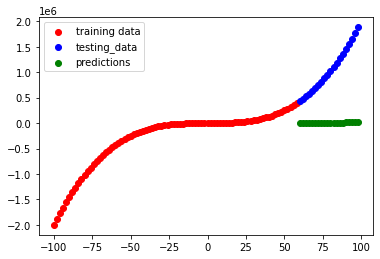

In [160]:
plot_pred(test_pred=y_pred_1)

In [171]:
# calculate evaluation metrics for model 1
mae_1=tf.metrics.MAE(y_test, tf.squeeze(y_pred_1))

In [162]:
model_1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 193ms/step - loss: 1038960.5000 - mae: 1038960.5000


[1038960.5, 1038960.5]

In [172]:
mse_1=tf.metrics.MSE(y_test, tf.squeeze(y_pred_1))

In [170]:
# second experiment
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=["mse"]
                )
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 11ms/step - loss: 362942.9375 - mse: 391494303744.0000
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 362577.0938 - mse: 390971260928.0000
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 359571.9062 - mse: 387298557952.0000
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 337514.7188 - mse: 356974919680.0000
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 267558.5312 - mse: 233801170944.0000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 222663.1250 - mse: 161812021248.0000
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 218262.8750 - mse: 130936979456.0000
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 220491.4062 - mse: 129103388672.0000
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 221512.6719 - mse: 145201201152.0000
Epoch 10/100
3/3 [=========

1/1 [==============================] - 0s 55ms/step


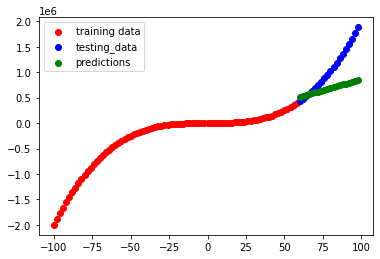

In [169]:
y_pred_2=model_2.predict(X_test)
plot_pred(test_pred=y_pred_2)

In [174]:
# calculate evaluation metrics for model 1
mae_2=tf.metrics.MAE(y_test, tf.squeeze(y_pred_2))

In [175]:
mse_2=tf.metrics.MSE(y_test, tf.squeeze(y_pred_2))

# compare result of our experiment


In [179]:
import pandas as pd
model_result=[["model_1", mae_1.numpy(),mse_1.numpy()], ["model_2", mae_2.numpy(), mse_2.numpy()]]

In [180]:
all_results=pd.DataFrame(model_result, columns=["model", "mae", "mse"])

In [181]:
all_results

,model,mae,mse
0,model_1,1.038960e+06,1.272582e+12
1,model_2,3.855511e+05,2.531567e+11


In [184]:
model_2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# two formate we can save models


1.   SavedModel format
2.   HDF5 format



In [185]:
model_2.save("best_model_savedmodel_formate")

In [186]:
model_2.save("hdf5formetmodel.h5")

In [188]:
# if you want to load and save within tensorflow environment, savedmodel formate is good but if you want to run model in other devices outside tenserflow  h5 is the best
# i recommend h5 for both

In [189]:
h5_model = tf.keras.models.load_model('hdf5formetmodel.h5')

In [195]:
saved_model = tf.keras.models.load_model('best_model_savedmodel_formate')
# in colap go to file three dot and copy file path and past here

In [192]:
h5_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [193]:
saved_model .summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [194]:
model_2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                20        
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [198]:
# compare each model prediction to know if they are parameter and evaluate each

In [197]:
# numpy.squeeze() for data is array not tensor, ie numpy method

# Download file 
1. 3 dot and download or use function
2. form google colab code
3. or save to google drive by connect it / mount google drive first 

In [199]:
from google.colab import files
files.download("/content/hdf5formetmodel.h5")
# copy path past it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
!cp /content/hdf5formetmodel.h5 /content/drive/MyDrive/tensorflow-course
# copy path destination and source

In [203]:
!ls /content/drive/MyDrive/tensorflow-course

hdf5formetmodel.h5


A larger example: 
lets step it up the notch

In [204]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
# read insurence dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [206]:
insurance_one_hot=pd.get_dummies(insurance)

In [207]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [215]:
X=insurance_one_hot.drop("charges", axis=1)
y=insurance_one_hot["charges"]

In [217]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [219]:
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 9ms/step - loss: 8631.9912 - mae: 8631.9912
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7885.9478 - mae: 7885.9478
Epoch 3/100
34/34 [==============================] - 1s 15ms/step - loss: 7603.1758 - mae: 7603.1758
Epoch 4/100
34/34 [==============================] - 1s 16ms/step - loss: 7791.2632 - mae: 7791.2632
Epoch 5/100
34/34 [==============================] - 0s 14ms/step - loss: 7652.7456 - mae: 7652.7456
Epoch 6/100
34/34 [==============================] - 0s 10ms/step - loss: 7569.6841 - mae: 7569.6841
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7550.4307 - mae: 7550.4307
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7797.7563 - mae: 7797.7563
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7614.1011 - mae: 7614.1011
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7712.4683 - mae: 7712.

In [220]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7212.8101 - mae: 7212.8101


[7212.81005859375, 7212.81005859375]

In [223]:
y_train.describe()
# look median/mean to compare evaluation

count     1070.000000
mean     13346.089736
std      12019.510778
min       1121.873900
25%       4897.667387
50%       9575.442100
75%      16746.657400
max      62592.873090
Name: charges, dtype: float64

In [235]:
# experiment
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 5ms/step - loss: 13240.9893 - mae: 13240.9893
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 12814.4893 - mae: 12814.4893
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 11659.3203 - mae: 11659.3203
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 9465.3223 - mae: 9465.3223
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 7660.1177 - mae: 7660.1177
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 7401.7529 - mae: 7401.7529
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 7368.9004 - mae: 7368.9004
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7336.7935 - mae: 7336.7935
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7303.7837 - mae: 7303.7837
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7272.5005 - mae: 727

In [236]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3193.8223 - mae: 3193.8223


[3193.822265625, 3193.822265625]

In [237]:
# experiment
tf.random.set_seed(42)

insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

history=insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 5ms/step - loss: 13282.9912 - mae: 13282.9912
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13113.0322 - mae: 13113.0322
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 12761.0527 - mae: 12761.0527
Epoch 4/200
34/34 [==============================] - 0s 8ms/step - loss: 12074.2275 - mae: 12074.2275
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 10936.0850 - mae: 10936.0850
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9500.3701 - mae: 9500.3701
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 8190.0879 - mae: 8190.0879
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 7556.0903 - mae: 7556.0903
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 7447.2964 - mae: 7447.2964
Epoch 10/200
34/34 [==============================] - 0s 7ms/step - loss: 7426.3062 - mae:

In [238]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3495.8650 - mae: 3495.8650


[3495.864990234375, 3495.864990234375]

Text(0.5, 0, 'epoches')

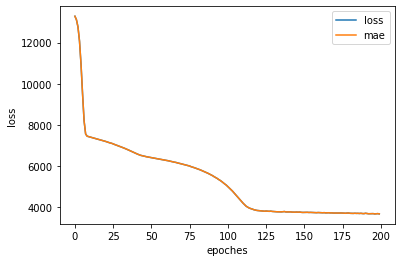

In [247]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoches")

In [245]:
history.history

,loss,mae
0,13282.991211,13282.991211
1,13113.032227,13113.032227
2,12761.052734,12761.052734
3,12074.227539,12074.227539
4,10936.084961,10936.084961
...,...,...
195,3681.333740,3681.333740
196,3666.959717,3666.959717
197,3673.892822,3673.892822
198,3681.495605,3681.495605


🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

# normalization and standardization(preprocessing)
feature scaling


In [248]:
from sklearn.compose import  make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [252]:
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]), #turn all given column between 0 an 1 
                           (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"])) #turn all column into one hot encoded

In [253]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [257]:
X=insurance.drop("charges", axis=1)
y=insurance["charges"]
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# now fit column transformer to our training data and later on use that fit column transformer to transform your test data otherwise if you do that separately, 
# test data model never seen data from future. if we transform training dataset with info from test dataset, its like taking knowledge from future and altering data that we have now
# so fit with only train data
ct.fit(X_train)

# lets normalize and one hot encode both
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [260]:
X_train_normal[0]
# data encoded

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [262]:
# experiment
tf.random.set_seed(42)
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

history=insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13343.5605 - mae: 13343.5605
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13334.3311 - mae: 13334.3311
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13311.9688 - mae: 13311.9688
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13265.7070 - mae: 13265.7070
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13184.3457 - mae: 13184.3457
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13056.6445 - mae: 13056.6445
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12872.3809 - mae: 12872.3809
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12621.5430 - mae: 12621.5430
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12294.0195 - mae: 12294.0195
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11886.63

In [263]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3167.4758 - mae: 3167.4758


[3167.475830078125, 3167.475830078125]

In [264]:
# when we normalize, model converges faster so, no need large epochs